In [1]:
import numpy as np
import re
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/' 

In [2]:
df_neg = pd.read_csv('negative.csv', delimiter=';',header=None )
df_pos = pd.read_csv('positive.csv', delimiter=';',header=None )

In [3]:
df_neg.columns = ['id','tdate','tmane','ttext','ttype','trep','trtw','tfav','tstcount','tfol','tfrien','listcount']
df_pos.columns = ['id','tdate','tmane','ttext','ttype','trep','trtw','tfav','tstcount','tfol','tfrien','listcount']

In [4]:
df_neg.head()

,id,tdate,tmane,ttext,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


In [5]:
df_pos.head()

,id,tdate,tmane,ttext,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [6]:
df =pd.concat((df_pos, df_neg), axis=0)

In [7]:
y =df.ttype

In [8]:
del df['ttype']

In [9]:
df.drop(['id', 'tdate'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226834 entries, 0 to 111922
Data columns (total 11 columns):
id           226834 non-null int64
tdate        226834 non-null int64
tmane        226834 non-null object
ttext        226834 non-null object
trep         226834 non-null int64
trtw         226834 non-null int64
tfav         226834 non-null int64
tstcount     226834 non-null int64
tfol         226834 non-null int64
tfrien       226834 non-null int64
listcount    226834 non-null int64
dtypes: int64(9), object(2)
memory usage: 20.8+ MB


In [11]:
df.tmane.nunique()

139658

In [12]:
df.drop(['tmane'], inplace=True)

In [13]:
import matplotlib
import seaborn as sns

In [14]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df);
sns_plot.savefig('pairplot.png')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [16]:
y_tr, y_val, x_tr,  x_val = train_test_split(y, df, test_size=0.2, random_state=42 )

In [446]:
text = x_tr.ttext

In [447]:
from sklearn.feature_extraction.text import CountVectorizer

In [448]:
from nltk.corpus import stopwords

In [449]:
stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [450]:
re_positive= re.compile('([\:;]*\-*[\)]+)|([\)D\*]+\-*\:)|(\^\_\^)|(\:\-*[d\*])', re.IGNORECASE)
re_negative = re.compile('(\:*\-*[(]+)|([\)D]+\-*\:)|(\:-*\|)|(\:\-\/)', re.IGNORECASE)
re_voscl =  re.compile('\!+')
re_users = re.compile('(@[\w\_]+)')
re_newline = re.compile('[\n\r]')


In [451]:
def preProcess(s):
    s= re_newline.sub(' ', s)
    s= re_users.sub(' $USER$ ', s)    
    s= re_positive.sub(' $POSITIVE$ ', s)
    s= re_negative.sub(' $NEGATIVE$ ', s)
    s= re_voscl.sub(' ! ', s)

    return s.lower()

In [452]:
#list(filter(None,re.split('([^а-яА-Я\s]+)|\s+', s)) )

In [541]:
countvec = CountVectorizer(min_df= 5, stop_words= stopwords.words('russian'),
                           preprocessor= preProcess,
                           tokenizer= lambda s: list(filter(None,re.split('([^а-яА-Я\s\d]+)|[\s+\.\!]', s))) ,
#                           token_pattern='(?u)\\b[\\w\\$\\!]{2,}\\b',
                           
                          )

In [542]:
countvec2 = CountVectorizer(min_df= 5, stop_words= stopwords.words('russian'),
                            preprocessor= lambda s: re.sub('http',' ', s) 
                          )

In [543]:
%%time
countvec.fit(x_tr.ttext)

Wall time: 15 s


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1),
        preprocessor=<function preProcess at 0x000000004DF3E7B8>,
        stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', '...гда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x0000000046801158>,
        vocabulary=None)

In [544]:
%%time
countvec2.fit(x_tr.ttext)

Wall time: 5.46 s


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1),
        preprocessor=<function <lambda> at 0x0000000046801598>,
        stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', '...гда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [545]:
data = countvec.transform(x_tr.ttext)

In [546]:
data2 = countvec2.transform(x_tr.ttext)

In [547]:
from sklearn.tree import DecisionTreeClassifier

In [575]:
tree = DecisionTreeClassifier(max_depth=3,  min_samples_leaf=10)

In [576]:
tree2 = DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=50)

In [577]:
from sklearn.model_selection import cross_val_score

In [578]:
res = cross_val_score(tree, data, y_tr, cv = 5, scoring='accuracy')

In [579]:
res

array([ 1.        ,  0.99994489,  0.99997245,  0.99991734,  0.99994489])

In [580]:
res2 = cross_val_score(tree2, data2, y_tr, cv = 5, scoring='accuracy')

In [581]:
res2  # с обычной токинизацией это почти монетка, а со смайликами почти сто процентное попадание

array([ 0.6665289 ,  0.66955971,  0.6749876 ,  0.66910975,  0.67257247])

In [554]:
from  sklearn.metrics import confusion_matrix

In [582]:
%%time
tree.fit(data, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [584]:
%%time
tree2.fit(data2, y_tr)

Wall time: 1min 26s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [585]:
data_val =  countvec.transform(x_val.ttext)
data2_val = countvec2.transform(x_val.ttext)

In [586]:
data_val.shape

(45367, 29110)

In [587]:
(data2.shape, data2_val.shape)

((181467, 33027), (45367, 33027))

In [588]:
prediction = tree.predict(data_val)
prediction2 = tree2.predict(data2_val)

In [589]:
confusion_matrix(prediction, y_val)

array([[22478,     1],
       [    2, 22886]])

In [590]:
confusion_matrix(prediction2, y_val)

array([[15032,  7455],
       [ 7448, 15432]])

In [591]:
import graphviz
import codecs
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/' 

In [592]:
#tree.fit(data,y_tr)

In [593]:
np.sort(tree.feature_importances_)[::-1][:10]

array([  9.98718810e-01,   1.27831390e-03,   1.47005685e-06,
         7.57740408e-07,   4.64797386e-07,   1.83510394e-07,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [594]:
featureimp = np.vstack((np.array(countvec.get_feature_names())[np.argsort(tree.feature_importances_)[::-1][:10]],
                        np.sort(tree.feature_importances_)[::-1][:10]))

In [595]:
featureimp.shape

(2, 10)

In [596]:
featureimp.T

array([['$positive$', '0.998718809990012'],
       ['$negative$', '0.001278313904951309'],
       ['rt', '1.4700568488577327e-06'],
       ['испугалась', '7.577404075800801e-07'],
       [',', '4.6479738603594265e-07'],
       ['бабушка', '1.8351039434014745e-07'],
       ['избежать', '0.0'],
       ['идут', '0.0'],
       ['идэх', '0.0'],
       ['ие6', '0.0']],
      dtype='<U34')

In [597]:
featureimp2 = np.vstack((np.array(countvec2.get_feature_names())[np.argsort(tree2.feature_importances_)[::-1][:10]],
                        np.sort(tree2.feature_importances_)[::-1][:10]))

In [598]:
featureimp2.T

array([['co', '0.07352844670839581'],
       ['хочу', '0.02371388541220776'],
       ['о_О', '0.020010626835206657'],
       ['DD', '0.019626308670202826'],
       ['спасибо', '0.01801094045981832'],
       ['могу', '0.014057771275314613'],
       ['блин', '0.013372414486879312'],
       ['жаль', '0.010685760266744768'],
       ['болит', '0.010529955552317713'],
       ['Спасибо', '0.010460792222791159']],
      dtype='<U33')

In [599]:
data_all = countvec.transform(df.ttext)

In [600]:
pred = tree.predict(data_all)

In [601]:
check = np.vstack((df.ttext,y,pred) )

In [602]:
check[:,0]

array([ '@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)',
       1, 1], dtype=object)

In [603]:
import pandas as pd

In [604]:
check = pd.DataFrame(check.T, columns=['text', 'y', 'pred'])

In [605]:
check.head()

,text,y,pred
0,"@first_timee хоть я и школота, но поверь, у на...",1,1
1,"Да, все-таки он немного похож на него. Но мой ...",1,1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1,1


In [606]:
check.loc[check.y!=check.pred].head(20)

,text,y,pred
18236,RT @vasiliy_org: Это скандал! :))) На Съезде в...,1,-1
72611,@anieverthen бабушка,1,-1
111420,#ПредновогодниеОбнимашки для @ForgiveMeMan Инц...,1,-1
121703,@Simonenko_OS я тоже тебе это обещаю Заичка:-...,-1,1
122373,"RT @vadelrigh65: Мда, я, реально, испугалась, ...",-1,1
142134,Надоело притворяться что это не так o_O строю ...,-1,1
161595,@ushikovaa @victoria75132 о_О тот самый сок? :-D,-1,1
166836,"""@MedvedOfRussia: Закон выборов в Роиссе. http...",-1,1
186326,"@verunO_o спасибо,девочка моя!всего самого хор...",-1,1
197699,Кто умеет фотошопить? Научите миня :сссс Или х...,-1,1


In [607]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    return  export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names)

In [419]:
import matplotlib

In [420]:
%matplotlib inline

In [421]:
graph = graphviz.Source(get_tree_dot_view(tree, countvec.get_feature_names(), ['neg', 'pos']))  

In [422]:
graph.render('tree')

'tree.pdf'

In [423]:
from IPython.display import display

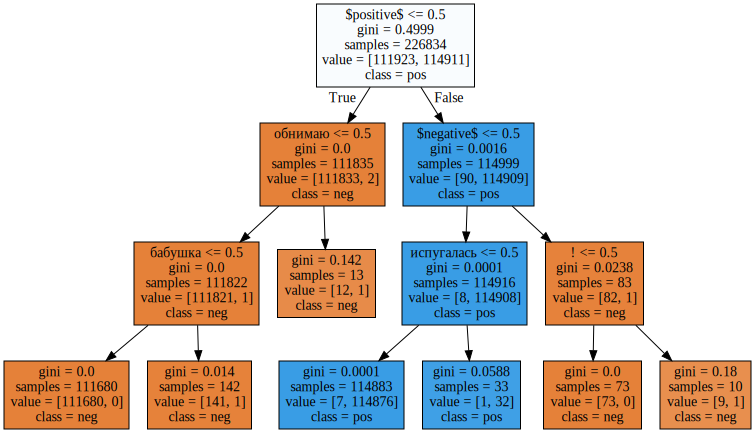

In [424]:
display(graph)

## по смайликам однозначно определяется, кто в твите позитвный. 
## Интересно, что при отсутствии позитывных смайликов, мы негативные уже не 
## проверяем. Может, потому, что если нет позитивных, то негативные то уж точно есть